In [256]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

np.set_printoptions(precision = 3)

In [212]:
def plot_matrix(matrix_seq, xAx, labels):
    true_neg = list(mat[0][0] for mat in matrix_seq)
    false_neg = list(mat[1][0] for mat in matrix_seq)
    false_pos = list(mat[0][1] for mat in matrix_seq)
    true_pos = list(mat[1][1] for mat in matrix_seq)
    #xAx = list(range(len(matrix_seq)))
    plt.plot(xAx, true_neg, color = 'red', label = 'TN')
    plt.plot(xAx, false_neg, color = 'blue', label = 'FN')
    plt.plot(xAx, true_pos, color = 'green', label = 'TP')
    plt.plot(xAx, false_pos, color = 'black', label = 'FP')
    plt.legend(loc='best')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth=1)
    plt.show()
    return 


def plot_scores(scores, param, labels):
    plt.plot(param, scores)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth=1)
    plt.show()
    return

def plot_metrics(metrics, xAx, labels):
    marks = ['o','v','x','D']
    i = 0
    for key in metrics:
        plt.plot(xAx, metrics[key], label = key, marker = marks[i])
        i += 1
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.grid(linewidth = 1)
    plt.legend(loc='best')
    plt.show()
    return

def full_plot(mat, par, mat_lab):
        
#     plt.figure(figsize=(10,10))
#     plt.subplot(2,1,1)
#     plt.title("Confusion matrix")
#     plot_matrix(mat, par, mat_lab)
    
#     plt.figure(figsize = (10,10))
#     plt.subplot(2,1,1)
    
    plt.figure(figsize = (10,10))
    plt.subplot(2,1,1)
    plt.title("Positive metrics")
    metrics = get_metrics(mat, 'positive')
    best_scores = get_best_scores(metrics)
    best_scores['Parameter'] = par[best_scores['Parameter']]
    plot_metrics(metrics, par, mat_lab)
    
    print_scores(best_scores)
    
#     plt.figure(figsize = (10,10))
#     plt.subplot(2,1,2)
#     plt.title("Negative metrics")
#     metrics = get_metrics(mat, 'negative')
#     best_scores = get_best_scores(metrics)
#     best_scores['Parameter'] = par[best_scores['Parameter']]
#     plot_metrics(metrics, par, mat_lab)
    
#     print_scores(best_scores)
    return best_scores
    
def print_scores(scor):
    for key in scor:
        print(key, '\t\t-\t', "%.4f" % (scor[key]))
    return
    
def get_metrics(matrix_seq, cl):
    true_neg = np.asarray(list(mat[0][0] for mat in matrix_seq))
    false_neg = np.asarray(list(mat[1][0] for mat in matrix_seq))
    false_pos = np.asarray(list(mat[0][1] for mat in matrix_seq))
    true_pos = np.asarray(list(mat[1][1] for mat in matrix_seq))
    
    if cl == 'positive':
        accuracy = 100*(true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        precision = 100*true_pos/np.add(true_pos, false_pos)
        recall = 100*true_pos/(true_pos + false_neg)
        FM = ((true_pos/(true_pos + false_pos))*(true_pos/(true_pos+false_neg)))**(1/2)
        F1score = 2*precision*recall/(precision+recall)
    elif cl == 'negative':
        accuracy = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
        precision = true_neg/np.add(true_neg, false_neg)
        recall = true_neg/(true_neg + false_pos)
        FM = ((true_pos/(true_pos + false_pos))*(true_pos/(true_pos+false_neg)))**(1/2)
        F1score = 2*precision*recall/(precision+recall)
        
    metr = dict()
    metr['Recall'] = recall
    metr['Precision'] = precision
    metr['F1 score'] = F1score
#     metr['Folwkes-Mallows'] = FM
    metr['Accuracy'] = accuracy
    return metr

def get_best_scores(metr):
    best_sc = dict()
    max_ind = np.argmax(metr['F1 score'])
    for key in metr:
        best_sc[key] = metr[key][max_ind]
    best_sc["Parameter"] = max_ind
    return best_sc

In [218]:
df = pd.read_csv('total_data_mining_vid.csv')

In [219]:
df = df.drop('contact_freq', 1)
df.head()

,Name,central_freq,central_freq_amp,peak_count,peak_mean,peak_SD,peak_matters_SD,peak_matters_Int,dixi,signal_peaks,sig_mean,sig_SD,target
0,marina1_0_Con,1.269531,0.024937,6,0.009430,0.005487,2.826011,0.019358,6.352830e-16,11,0.797182,0.100137,0
1,marina1_1_Con,1.269531,0.025100,6,0.009473,0.005534,2.823573,0.019494,5.587141e-01,12,0.797405,0.099999,1
2,marina1_2_Con,1.269531,0.025121,6,0.009466,0.005525,2.833311,0.019513,1.555379e-16,12,0.797461,0.099981,1
3,marina1_3_Con,1.269531,0.025122,6,0.009410,0.005496,2.858880,0.019503,1.567477e-16,12,0.797321,0.100062,1
4,marina1_4_Con,1.269531,0.025625,5,0.009436,0.005772,2.804777,0.019717,4.358380e-16,12,0.796177,0.102167,1


df = df.drop('contact_freq', 1)
df.head()

In [307]:
nulls = df[df['target']==0].count()
nulls = nulls['Name']
ones = df[df['target']==1].count()
ones = ones['Name']

lenDiff = abs(nulls-ones)
halfLength = int(ones/2)
start = int(ones*2/3)
stop = int(ones/3)
print(halfLength)
print(lenDiff)

2654
80652


In [308]:
df_null = df[df['target']==0].iloc[lenDiff:]
df_ed = df[df['target']==1]
df_train = pd.concat([df_null.head(start), df_ed.head(start)], ignore_index = True)
df_ver = pd.concat([df_null.tail(stop), df_ed.tail(stop)], ignore_index = True)

df_train.sample(frac=1).reset_index(drop=True)
df_ver.sample(frac=1).reset_index(drop=True)

print(df_train[df_train['target']==0].count())
print(df_train[df_train['target']==1].count())

Name                3538
central_freq        3538
central_freq_amp    3538
peak_count          3538
peak_mean           3538
peak_SD             3538
peak_matters_SD     3538
peak_matters_Int    3538
dixi                3538
signal_peaks        3538
sig_mean            3538
sig_SD              3538
target              3538
dtype: int64
Name                3538
central_freq        3538
central_freq_amp    3538
peak_count          3538
peak_mean           3538
peak_SD             3538
peak_matters_SD     3538
peak_matters_Int    3538
dixi                3538
signal_peaks        3538
sig_mean            3538
sig_SD              3538
target              3538
dtype: int64


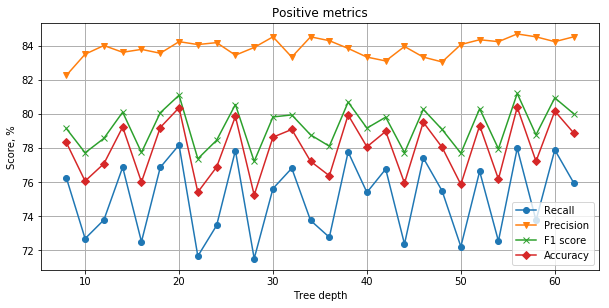

Recall 		-	 77.9802
Precision 		-	 84.6806
F1 score 		-	 81.1924
Accuracy 		-	 80.3844
Parameter 		-	 56.0000


In [309]:
features = ['central_freq', 'central_freq_amp', 'peak_count', 'peak_SD', 'peak_matters_SD', 'peak_matters_Int','sig_SD','sig_mean', 'dixi', 'signal_peaks']
scores = []
conf_mat = []
deps = []

for i in range(8,64, 2):    
    age_sal_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features = len(features), random_state=None)
    age_sal_tree.fit(df_train[features].values, df_train['target'].values)
    scoreRes = age_sal_tree.score(df_ver[features].values, df_ver['target'].values)
    res_pred = age_sal_tree.predict(df_ver[features].values)
    scores.append(scoreRes*100)
    conf_mat.append(100*confusion_matrix(res_pred, df_ver['target'].values)/halfLength)
    deps.append(i)
    
full_plot(conf_mat, deps, ['Tree depth', 'Score, %'])

export_graphviz(age_sal_tree, out_file='tree.dot', precision=5)


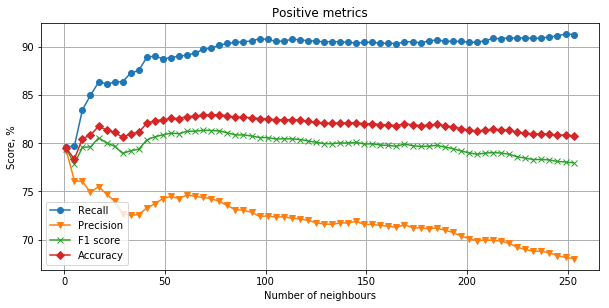

Recall 		-	 89.7273
Precision 		-	 74.3783
F1 score 		-	 81.3350
Accuracy 		-	 82.9314
Parameter 		-	 69.0000


{'Accuracy': 82.931424265259977,
 'F1 score': 81.334981458590846,
 'Parameter': 69,
 'Precision': 74.378296910324039,
 'Recall': 89.727272727272734}

In [255]:
neis = []
scores = []
conf_mat = []
for i in range(1,256, 4):
    nei = KNeighborsClassifier(n_neighbors=i)
    nei.fit(df_train[features].values, df_train['target'].values)
    scoreRes = nei.score(df_ver[features].values, df_ver['target'].values)
    neis.append(i)
    scores.append(scoreRes*100)
    res_pred = nei.predict(df_ver[features].values)
    conf_mat.append(100*confusion_matrix(res_pred, df_ver['target'].values)/halfLength)

full_plot(conf_mat, neis, ["Number of neighbours", "Score, %"])

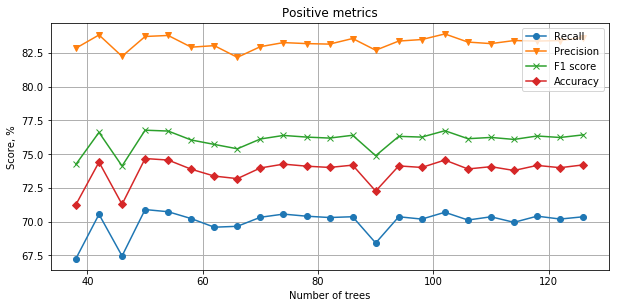

Recall 		-	 70.8998
Precision 		-	 83.7227
F1 score 		-	 76.7795
Accuracy 		-	 74.6797
Parameter 		-	 50.0000


{'Accuracy': 74.679728711379042,
 'F1 score': 76.779543883897702,
 'Parameter': 50,
 'Precision': 83.722682743029381,
 'Recall': 70.899808551372033}

In [216]:
# The official page of the algorithm states that random forest does not overfit,
# and you can use as much trees as you want. But Mark R. Segal 
# (April 14 2004. "Machine Learning Benchmarks and Random Forest Regression."
#  Center for Bioinformatics & Molecular Biostatistics) has found that it overfits
# for some noisy datasets. So to obtain optimal number you can try training random 
# forest at a grid of ntree parameter (simple, but more CPU-consuming) or build one 
# random forest with many trees with keep.inbag, calculate out-of-bag (OOB) error rates
# for first nn trees (where nn changes from 11 to ntree) and plot OOB error rate vs. 
# number of trees (more complex, but less CPU-consuming).

scores = []
estims = []
conf_mat = []

for i in range(38, 128, 4):    
    fore = RandomForestClassifier(n_estimators = i, max_features = len(features), random_state=None)
    fore.fit(df_train[features].values, df_train['target'].values)
    scoreRes = fore.score(df_ver[features].values, df_ver['target'].values)
    res_pred = fore.predict(df_ver[features].values)
#     print(age_sal_tree.feature_importances_)
    scores.append(scoreRes)
    conf_mat.append(confusion_matrix(res_pred, df_ver['target'].values)/halfLength)
    estims.append(i)
full_plot(conf_mat, estims, ["Number of trees", "Score, %"])


/home/ivan7chuk/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/ivan7chuk/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/home/ivan7chuk/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:421: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)


newton-cg


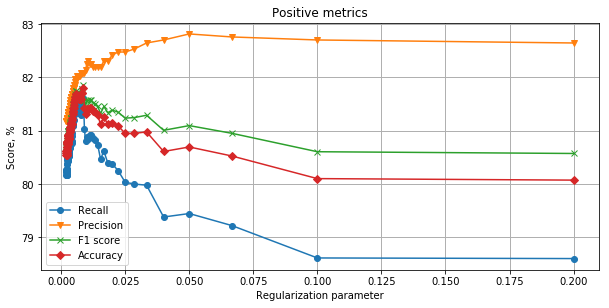

Recall 		-	 81.6189
Precision 		-	 82.0803
F1 score 		-	 81.8489
Accuracy 		-	 81.7976
Parameter 		-	 0.0087
lbfgs


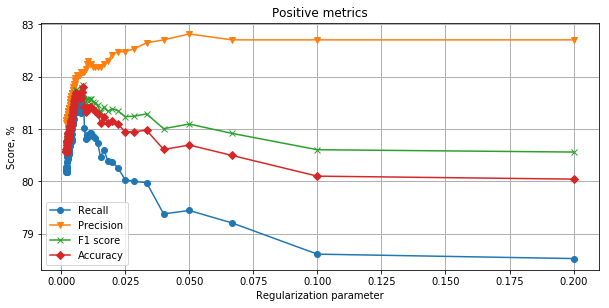

Recall 		-	 81.6189
Precision 		-	 82.0803
F1 score 		-	 81.8489
Accuracy 		-	 81.7976
Parameter 		-	 0.0087
liblinear


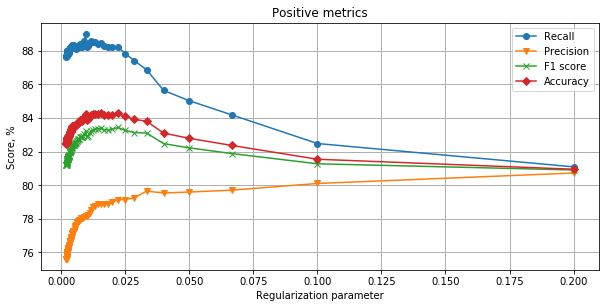

Recall 		-	 88.2168
Precision 		-	 79.1408
F1 score 		-	 83.4327
Accuracy 		-	 84.2849
Parameter 		-	 0.0222


/home/ivan7chuk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


sag


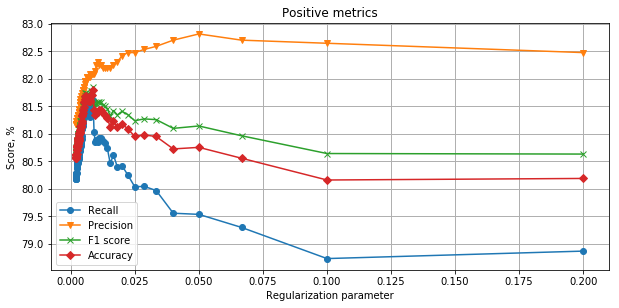

Recall 		-	 81.6189
Precision 		-	 82.0803
F1 score 		-	 81.8489
Accuracy 		-	 81.7976
Parameter 		-	 0.0087
saga


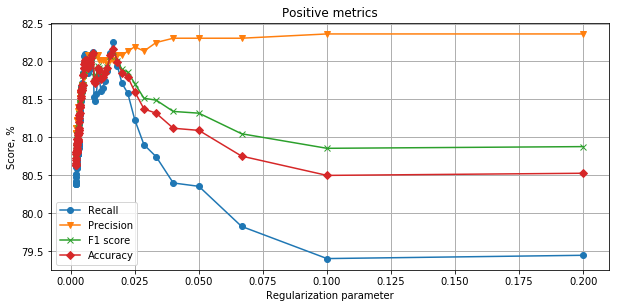

Recall 		-	 82.2562
Precision 		-	 82.0237
F1 score 		-	 82.1398
Accuracy 		-	 82.1651
Parameter 		-	 0.0167


In [310]:
lin_clf = linear_model.LogisticRegression()
penalties = ['l1','l2']

lin_clf.tol = 0.000001 
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for sol in solvers:
    lin_clf.solver = sol
    scores = []
    alphas = []
    conf_mat = []
    for i in range(10, 1000, 10):
        a = 2/i
        lin_clf.C = a
        lin_clf.fit(df_train[features].values, df_train['target'].values)
        scoreRes = lin_clf.score(df_ver[features].values, df_ver['target'].values)
        res_pred = lin_clf.predict(df_ver[features].values)
        scores.append(scoreRes)
        conf_mat.append(confusion_matrix(res_pred, df_ver['target'].values)/halfLength)
        alphas.append(a)
    print(sol)
    full_plot(conf_mat, alphas, ["Regularization parameter", 'Score, %'])
    plt.show()

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 5), activation = 'logistic', learning_rate = 'adaptive')
    

scores = []
alphas = []
conf_mat = []
for i in range(200, 50000, 100):
    a = 2/i
    clf.alpha = a
    clf.fit(df_train[features].values, df_train['target'].values)
    scoreRes = clf.score(df_ver[features].values, df_ver['target'].values)
    res_pred = clf.predict(df_ver[features].values)
    scores.append(scoreRes)
    conf_mat.append(confusion_matrix(res_pred, df_ver['target'].values)/halfLength)
    alphas.append(a)
print(sol)
full_plot(conf_mat, alphas, ["Regularization parameter", 'Score, %'])
plt.show()

saga


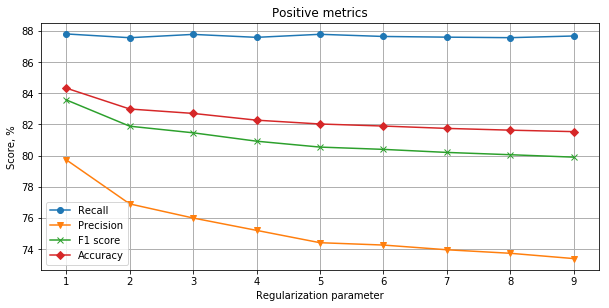

Recall 		-	 87.8008
Precision 		-	 79.7287
F1 score 		-	 83.5703
Accuracy 		-	 84.3255
Parameter 		-	 1.0000


In [290]:
clf = SVC(kernel = 'rbf',degree = 2, C = 0.001)
    

scores = []
alphas = []
conf_mat = []
for i in range(1, 10, 1):
    a = i
    clf.C = a
    clf.fit(df_train[features].values, df_train['target'].values)
    scoreRes = clf.score(df_ver[features].values, df_ver['target'].values)
    res_pred = clf.predict(df_ver[features].values)
    scores.append(scoreRes)
    conf_mat.append(confusion_matrix(res_pred, df_ver['target'].values)/halfLength)
    alphas.append(a)
print(sol)
full_plot(conf_mat, alphas, ["Regularization parameter", 'Score, %'])
plt.show()